In [2]:
import numpy as np 
import cv2 
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
from PIL import Image
from __future__ import print_function
import argparse

file_path = "C:/Users/aya-k/OneDrive/Bureau/VMI_M2/Projet_image/Visucule_Segmentation_with_ControurRegularisation"
image5_Path ="5_Vesicule.jpg"
image6_Path ="6_Vesicule.jpg"
image7_Path ="7_Vesicule.jpg"

points5_file="5_VesiculePoints.csv"
points6_file="6_VesiculePoints.csv"
points7_file="7_VesiculePoints.csv"

CenterP5_file="5_CoordinateCenter.csv"
CenterP6_file="6_CoordinateCenter.csv"
CenterP7_file="7_CoordinateCenter.csv"



In [3]:
def dilatation(src):
    
    dilatation_size = cv2.getTrackbarPos(title_trackbar_kernel_size, title_dilatation_window)
    dilatation_type = 0
    val_type = cv2.getTrackbarPos(title_trackbar_element_type, title_dilatation_window)
    if val_type == 0:
        dilatation_type = cv2.MORPH_RECT
    elif val_type == 1:
        dilatation_type = cv2.MORPH_CROSS
    elif val_type == 2:
        dilatation_type = cv2.MORPH_ELLIPSE
    
    element = cv2.getStructuringElement(dilatation_type, (2*dilatation_size + 1, 2*dilatation_size+1), (dilatation_size,   dilatation_size))
    dilatation_dst = cv2.dilate(src, element)
    cv2.imshow(title_dilatation_window, dilatation_dst)    

Step 1 : Visualisaton

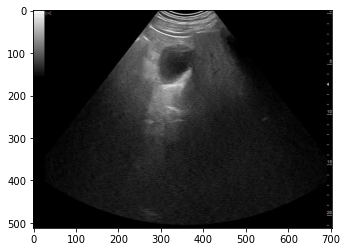

In [4]:
image5= cv2.imread(os.path.join(file_path,image5_Path))
plt.imshow(image5)


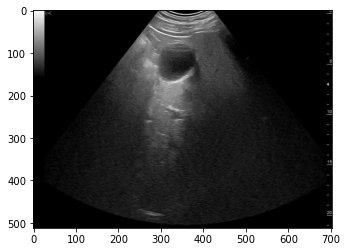

In [5]:
image6= cv2.imread(os.path.join(file_path,image6_Path))
plt.imshow(image6)


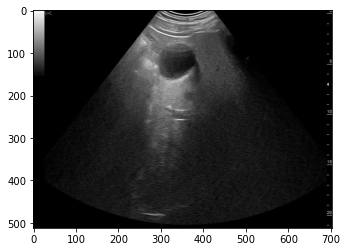

In [6]:
image7= cv2.imread(os.path.join(file_path,image7_Path))
plt.imshow(image7)

Step 2 : plot the contour points on the images

In [7]:
#Read the csv points files
points5_df = pd.read_csv(os.path.join(file_path,points5_file),sep=";")
points6_df = pd.read_csv(os.path.join(file_path,points6_file),sep=";")
points7_df = pd.read_csv(os.path.join(file_path,points7_file),sep=";")



In [8]:
#Read the centers points files 
CP5_df=pd.read_csv(os.path.join(file_path,CenterP5_file),sep=";")
CP6_df=pd.read_csv(os.path.join(file_path,CenterP6_file),sep=";")
CP7_df=pd.read_csv(os.path.join(file_path,CenterP7_file),sep=";")

In [9]:
CP5_df.head()

,X Coordinate,Y Coordinate
0,346,129


In [10]:
CP6_df.head()
CP6_df.keys()

Index(['X Coordinate', 'Y Coordinate'], dtype='object')

In [11]:
CP7_df.head()
CP7_df.keys()

Index(['X Coordinate', 'Y Coordinate'], dtype='object')

In [12]:
points5_df.head()


,Angle,x,y
0,0,392,129
1,2,391,130
2,4,363,130
3,6,364,130
4,8,386,134


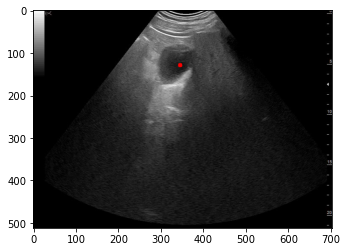

In [13]:
#plot the center point on the images 
#plot center on image 5
# Get the center coordinate.
x_center=int(CP5_df.get(['X Coordinate'][0]) )
y_center =int(CP5_df.get(['Y Coordinate'][0]))

imgpltC5=image5
imgpltC5 = cv2.circle(imgpltC5, (x_center,y_center), radius=0, color=(255, 0, 0), thickness=10)
plt.imshow(imgpltC5)





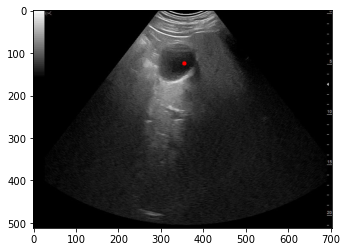

In [14]:
#plot center on image 6
# Get the center coordinate.
x_center=int(CP6_df.get(['X Coordinate'][0]) )
y_center =int(CP6_df.get(['Y Coordinate'][0]))

imgpltC6=image6
imgpltC6 = cv2.circle(imgpltC6, (x_center,y_center), radius=0, color=(255, 0, 0), thickness=10)
plt.imshow(imgpltC6)

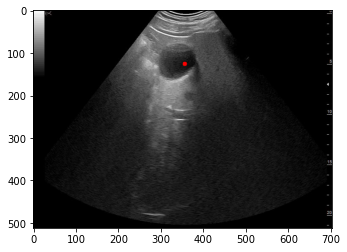

In [15]:
#plot center on image 7
# Get the center coordinate.
x_center=int(CP7_df.get(['X Coordinate'][0]) )
y_center =int(CP7_df.get(['Y Coordinate'][0]))

imgpltC7 =image7
imgpltC7 = cv2.circle(imgpltC7, (x_center,y_center), radius=0, color=(255, 0, 0), thickness=10)

plt.imshow(imgpltC7)

Plot initals points on the images

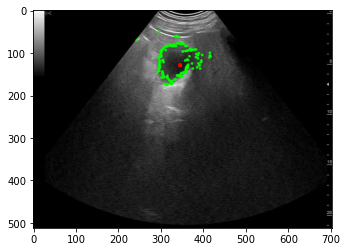

In [16]:
#Plot points for image 5
data = points5_df.values
imgplt5 = image5
for i in range(len(data)):
    x=data[i][1]
    y=data[i][2]
    imgplt5= cv2.circle(imgplt5, (x,y), radius=0, color=(0, 255, 0), thickness=5)


plt.imshow(imgplt5)


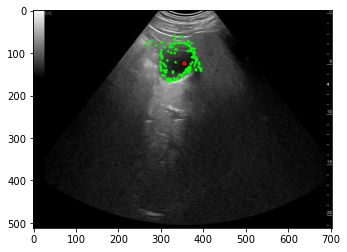

In [17]:
#Plot points for image 6
data = points6_df.values
imgplt6 = image6
for i in range(len(data)):
    x=data[i][1]
    y=data[i][2]
    imgplt6= cv2.circle(imgplt6, (x,y), radius=0, color=(0, 255, 0), thickness=5)


plt.imshow(imgplt6)


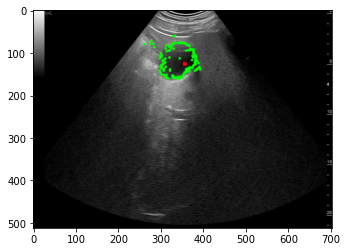

In [18]:
#Plot points for image 7
data = points7_df.values
imgplt7 = image7
for i in range(len(data)):
    x=data[i][1]
    y=data[i][2]
    imgplt7= cv2.circle(imgplt7, (x,y), radius=0, color=(0, 255, 0), thickness=5)


plt.imshow(imgplt7)


Dilatation function 

In [19]:
def Dilation(src,size):

    dilatation_type = cv2.MORPH_RECT
    #title_dilatation_window = 'Dilation Demo'


    element = cv2.getStructuringElement(dilatation_type, (2*dilatation_size + 1, 2*dilatation_size+1), (dilatation_size,                  dilatation_size))

    dilatation_dst = cv2.dilate(src, element)
    return(dilatation_dst)
    


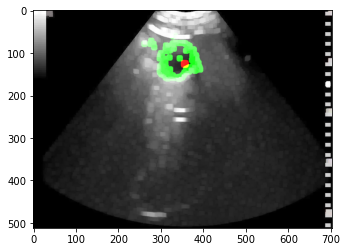

In [20]:
src =imgplt7
dilatation_size =4
dilatation_dst = Dilation(src,dilatation_size)
plt.imshow(dilatation_dst)

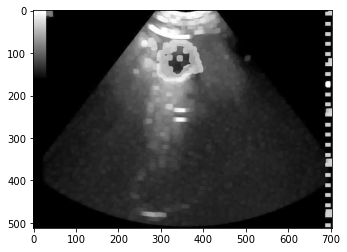

In [23]:
srcGrey=cv2.cvtColor(dilatation_dst, cv2.COLOR_BGR2GRAY)
#val,srcBinary = cv2.threshold(srcGrey, 127, 255, cv2.THRESH_BINARY)
plt.imshow(srcGrey,cmap='gray',vmin=0,vmax=255)


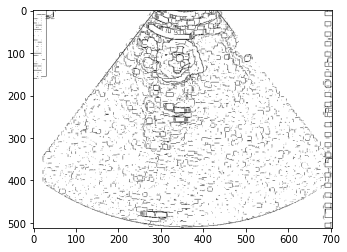

In [24]:
srcBinary = cv2.adaptiveThreshold(srcGrey,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,2)
plt.imshow(srcBinary,cmap='gray',vmin=0,vmax=255)


In [26]:
#srcBinary = cv2.adaptiveThreshold(srcGrey,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,2)
#plt.imshow(srcBinary,cmap='gray',vmin=0,vmax=255)

In [35]:
num_labels, labels_im = cv2.connectedComponents(srcBinary,8)


error: OpenCV(4.0.1) c:\ci\opencv-suite_1573470242804\work\modules\highgui\src\precomp.hpp:131: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'


In [34]:
def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    cv2.imshow('labeled.png', labeled_img)
    cv2.waitKey()

imshow_components(labels_im)